In [12]:
import pandas as pd
import csv
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import re

In [13]:
"""
The only thing we have is a .TXT file , to manipulate it i decided to take the regular approach 
and convert it to a .CSV file, we can just open a blank .CSV file and drag the .TXT file in it.
in this block i did it manually.
"""

txt_file = r"C:/Users/NSC/Desktop/github/bioinfo-index-sem.txt"
csv_file = r"C:/Users/NSC/Desktop/github/bio.csv"    #  The .CSV file will be created and located in this path

in_txt = csv.reader(open(txt_file, "r"), delimiter = '\t')   
out_csv = csv.writer(open(csv_file, 'w'))
out_csv.writerows(in_txt)

In [15]:
data = pd.read_csv('C:/Users/NSC/Desktop/github/bio.csv')

In [17]:
pd.set_option('display.max_colwidth',-1)
data.head()

<ipython-input-17-14217932edab>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


,ID,TEXT
0,0,"Life threatening giant <span class=""misc"" mc=""Mediastinal"">mediastinal</span> goiter : a surgical challenge . <span class=""misc"" mc=""Mediastinal"">Mediastinal</span> goiter is a well known benign disease , usually resectable through a <span class=""misc"" mc=""Cervical approach"">cervical approach</span> with minimal morbidity and mortality."
1,0,"Only occasionally a <span class=""tech"" mc=""Sternotomy"">median sternotomy</span> or a <span class=""misc"" mc=""Lateral"">lateral</span> <span class=""tech"" mc=""Thoracotomy"">thoracotomy</span> may be required."
2,0,The present case is worthy of presentation because of the exceptional dimension of the disease and the surgical challenge that it presented.
3,0,"In a 72 year <span class=""org"" mc=""Elderly woman"">old woman</span> a large <span class=""mal"" mc=""Intrathoracic Goiter"">intrathoracic goiter</span> of the right <span class=""anat"" mc=""Thorax"">thorax</span> caused a <span class=""misc"" mc=""Severe"">severe</span> <span class=""mal"" mc=""Dyspnea"">dyspnoea</span> due to an important <span class=""misc"" mc=""Contralateral"">contralateral</span> <span class=""misc"" mc=""Mediastinal"">mediastinal</span> shift with <span class=""tech"" mc=""Compression procedure"">compression</span> of the <span class=""anat"" mc=""Lung"">lung</span> , <span class=""anat"" mc=""Superior Vena Cava"">superior vena cava</span> system and <span class=""anat"" mc=""Trachea"">trachea</span>."
4,0,"At surgical exploration , through a cervico sternotomic approach , the <span class=""misc"" mc=""Mediastinal"">mediastinal</span> structures dislocation and the strong adherences between the anomalous neovascularized capsula of the mass and the <span class=""misc"" mc=""Circumferential"">surrounding</span> structures , complicated the surgical <span class=""tech"" mc=""Dissection"">dissection</span>."


# this need a lot of cleaning
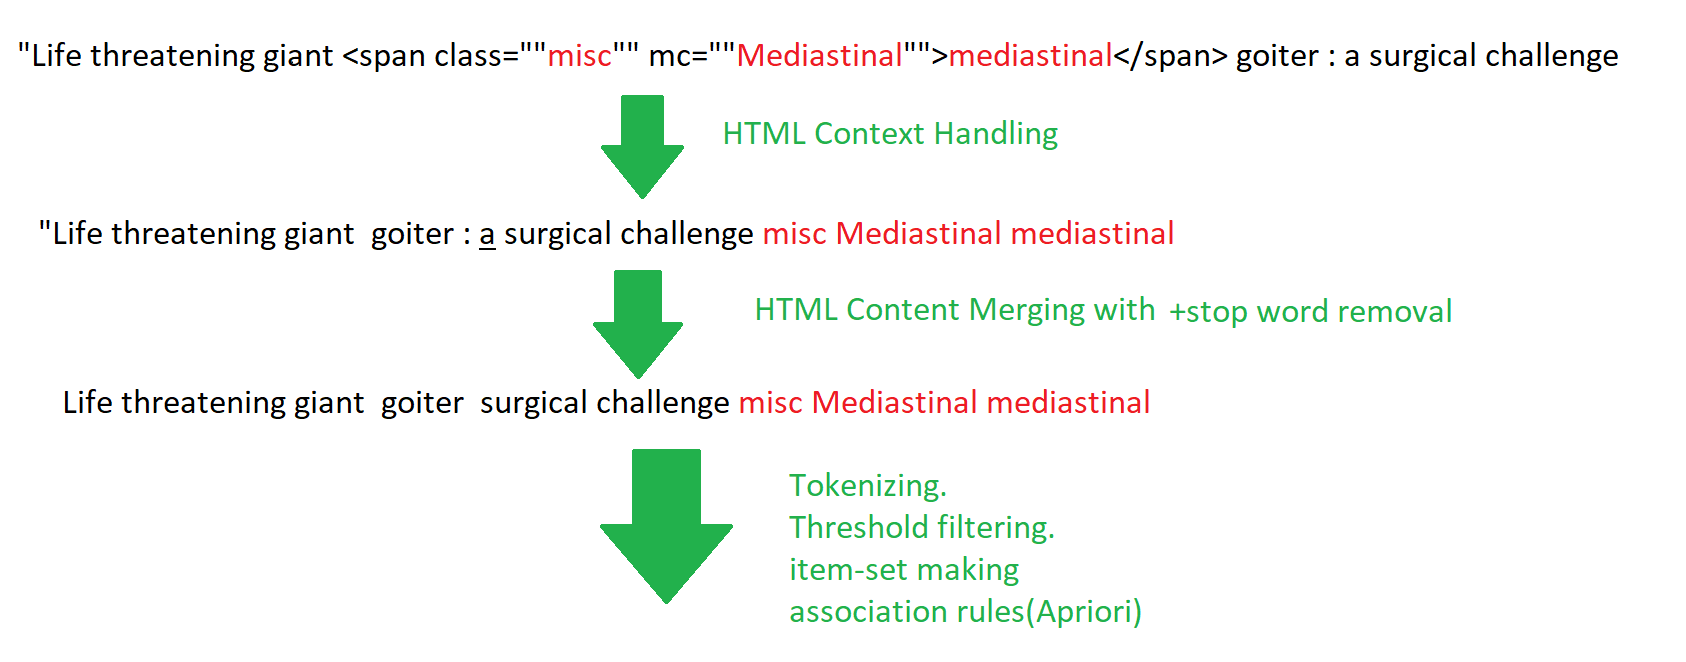

In [18]:
def span_handling(text):
    cleanr=re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', text)
    return cleantext
tag = '<span class=""misc"" mc=""Mediastinal"">mediastinal</span> goiter : a surgical challenge . <span class=""misc"" mc=""Mediastinal"">Mediastinal</span>'
print("Span handling:  \n------------\n "+ span_handling(tag))

Span handling:  
------------
  mediastinal  goiter : a surgical challenge .  Mediastinal 


In [19]:
def remove_punct(s):
    exclude = set(string.punctuation)
    #table = bytes.maketrans("","")
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    return regex.sub('', s)   # From Vinko's solution, with fix.

#Example
s = ' s-t_r)i=n$g w!i;t,h pu&n.c+t-u*a/tion!!       '
remove_punct(s)

' string with punctuation       '

In [20]:
def extract_class(text):
    m = re.findall('class=(.+?)\s', text)
    return m

def extract_mc(text):
    m = re.findall('mc=(.+?)"', text)
    return m


def extract_span_content(text):
        m = re.findall('>(\w.+?)<', text)
        return m
    
def spliter(sentence):
    m=sentence.split()
    return m

#example
x='Life threatening giant mediastinal goiter  '
spliter(x)

['Life', 'threatening', 'giant', 'mediastinal', 'goiter']

In [21]:
#example
tag = '<span class=""misc"" mc=""Mediastinal"">mediastinal</span> goiter : a surgical challenge . <span class=""misc"" mc=""Mediastinal"">Mediastinal</span>'
extract_span_content(tag)   #this will not be used because The above method "Span_handling" is a better version of it     


['mediastinal', 'Mediastinal']

In [22]:
data.columns = ['id', 'text']
data['classes'] = data['text'].apply(lambda x: extract_class(x))  # Creating new columns based on 'classes and mcs' conten 
data['mcs'] = data['text'].apply(lambda x: extract_mc(x))
#data['span_content'] = data['text'].apply(lambda x: extract_span_content(x))

In [23]:
data['text'] = data['text'].apply(lambda x: span_handling(x))

In [24]:
#Handling TypeError: expected string or bytes-like object 
data['text'] =data['text'].astype(str)
data['mcs'] =data['mcs'].astype(str)
#data['span_content'] =data['span_content'].astype(str)
data['classes'] =data['classes'].astype(str)

In [25]:
 # Remove Punct
data['mcs'] = data['mcs'].apply(lambda x: remove_punct(x))
#data['span_content'] = data['span_content'].apply(lambda x: remove_punct(x))
data['text'] = data['text'].apply(lambda x: remove_punct(x))
data['classes'] = data['classes'].apply(lambda x: remove_punct(x))   
data.head()

,id,text,classes,mcs
0,0,Life threatening giant mediastinal goiter a surgical challenge Mediastinal goiter is a well known benign disease usually resectable through a cervical approach with minimal morbidity and mortality,misc misc misc,Mediastinal Mediastinal Cervical approach
1,0,Only occasionally a median sternotomy or a lateral thoracotomy may be required,tech misc tech,Sternotomy Lateral Thoracotomy
2,0,The present case is worthy of presentation because of the exceptional dimension of the disease and the surgical challenge that it presented,,
3,0,In a 72 year old woman a large intrathoracic goiter of the right thorax caused a severe dyspnoea due to an important contralateral mediastinal shift with compression of the lung superior vena cava system and trachea,org mal anat misc mal misc misc tech anat anat anat,Elderly woman Intrathoracic Goiter Thorax Severe Dyspnea Contralateral Mediastinal Compression procedure Lung Superior Vena Cava Trachea
4,0,At surgical exploration through a cervico sternotomic approach the mediastinal structures dislocation and the strong adherences between the anomalous neovascularized capsula of the mass and the surrounding structures complicated the surgical dissection,misc misc tech,Mediastinal Circumferential Dissection


.
.
.
.
.


# As we are going to use the data-set for association rules
# so unlike Part-Of-Speech Tagging use cases, the order of words is not necessary in the apriori algorithm
# because words will be treated as items, combination of them will be just an item-set
# all we need is to clear noisy data and extract the content of the html tags
# just as a preparation for the "stop-words handling phase"
#  when we are using Unigram tokens 
# the algo will treat words as items or columns, and the whole sentence as a row, like this example

.
.
.
.
.
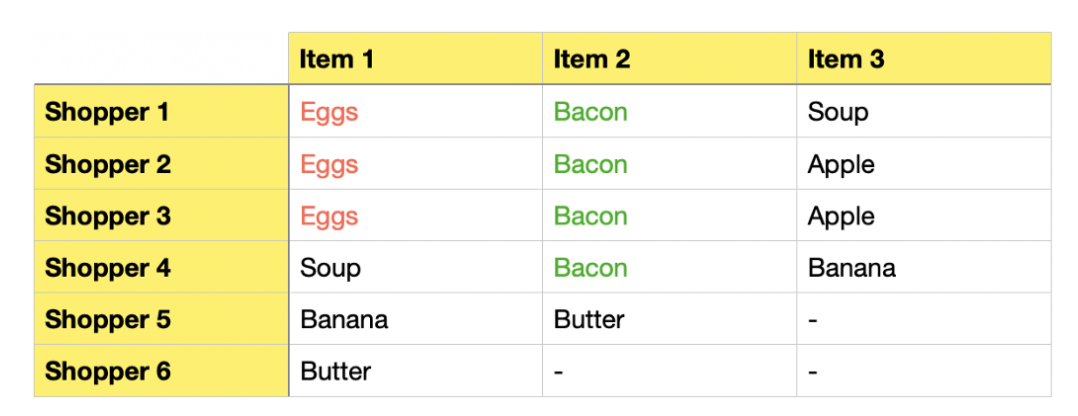




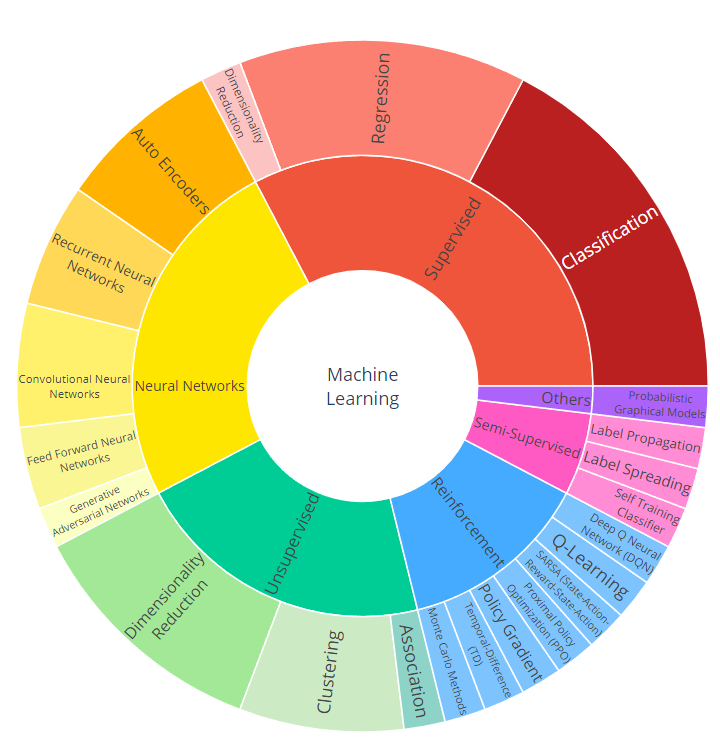

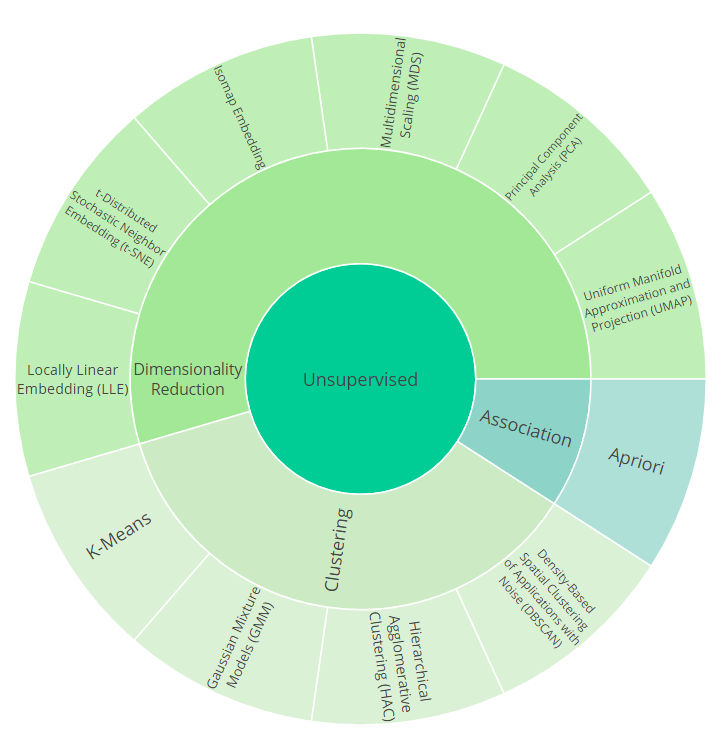

In [27]:
"""
this part of code will affect the performance  of the algorithm

we have multiple options for preparing the data-set :

dataset 1 - does not contain mc"ABC" content
dataset 2 - does not contain class"ABC" content
...
..
.
i will prepare a dataset that contains all the informations in the .TXT file
plain text content + span content + class content + mc content

"""


data['full_text']= data['text']+data['classes']+data['mcs'] #+data['span_content']

## We could've optimize the remove_punct lambda block by merging columns then call it once, 
# i did it to give attention to the code optimization part as well 

# Now the column [full_text]  contains all the informations we need, we can drop all other columns 

In [29]:
data = data.drop(data.columns[[ 1,2, 3]], axis=1)
data.head()

,id,full_text
0,0,Life threatening giant mediastinal goiter a surgical challenge Mediastinal goiter is a well known benign disease usually resectable through a cervical approach with minimal morbidity and mortalitymisc misc miscMediastinal Mediastinal Cervical approach
1,0,Only occasionally a median sternotomy or a lateral thoracotomy may be requiredtech misc techSternotomy Lateral Thoracotomy
2,0,The present case is worthy of presentation because of the exceptional dimension of the disease and the surgical challenge that it presented
3,0,In a 72 year old woman a large intrathoracic goiter of the right thorax caused a severe dyspnoea due to an important contralateral mediastinal shift with compression of the lung superior vena cava system and trachea org mal anat misc mal misc misc tech anat anat anatElderly woman Intrathoracic Goiter Thorax Severe Dyspnea Contralateral Mediastinal Compression procedure Lung Superior Vena Cava Trachea
4,0,At surgical exploration through a cervico sternotomic approach the mediastinal structures dislocation and the strong adherences between the anomalous neovascularized capsula of the mass and the surrounding structures complicated the surgical dissection misc misc techMediastinal Circumferential Dissection


.
.
.
.

# the next goal is removing stopwords.
# -when we have created the full_text column by default it's datatype was object we had better change it to String Dtype
# after that we need to unify the text to lowercase
# the final step is removing stopwords

.
.
.
.

In [30]:
data = data.astype(dtype={'full_text': 'string'})
data['full_text'] = [np.char.lower(x) for x in data['full_text']]
data.head()


,id,full_text
0,0,life threatening giant mediastinal goiter a surgical challenge mediastinal goiter is a well known benign disease usually resectable through a cervical approach with minimal morbidity and mortalitymisc misc miscmediastinal mediastinal cervical approach
1,0,only occasionally a median sternotomy or a lateral thoracotomy may be requiredtech misc techsternotomy lateral thoracotomy
2,0,the present case is worthy of presentation because of the exceptional dimension of the disease and the surgical challenge that it presented
3,0,in a 72 year old woman a large intrathoracic goiter of the right thorax caused a severe dyspnoea due to an important contralateral mediastinal shift with compression of the lung superior vena cava system and trachea org mal anat misc mal misc misc tech anat anat anatelderly woman intrathoracic goiter thorax severe dyspnea contralateral mediastinal compression procedure lung superior vena cava trachea
4,0,at surgical exploration through a cervico sternotomic approach the mediastinal structures dislocation and the strong adherences between the anomalous neovascularized capsula of the mass and the surrounding structures complicated the surgical dissection misc misc techmediastinal circumferential dissection


In [31]:
import io
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
eng_stopwords = stopwords.words('english') 

In [33]:
data = data.astype(dtype={'full_text': 'string'})
data['clean_text'] =data['full_text'].apply(lambda x: ' '.join([item for item in re.split(r'\W+', x)                      if item not in eng_stopwords and item != '']))
data.head()

,id,full_text,clean_text
0,0,life threatening giant mediastinal goiter a surgical challenge mediastinal goiter is a well known benign disease usually resectable through a cervical approach with minimal morbidity and mortalitymisc misc miscmediastinal mediastinal cervical approach,life threatening giant mediastinal goiter surgical challenge mediastinal goiter well known benign disease usually resectable cervical approach minimal morbidity mortalitymisc misc miscmediastinal mediastinal cervical approach
1,0,only occasionally a median sternotomy or a lateral thoracotomy may be requiredtech misc techsternotomy lateral thoracotomy,occasionally median sternotomy lateral thoracotomy may requiredtech misc techsternotomy lateral thoracotomy
2,0,the present case is worthy of presentation because of the exceptional dimension of the disease and the surgical challenge that it presented,present case worthy presentation exceptional dimension disease surgical challenge presented
3,0,in a 72 year old woman a large intrathoracic goiter of the right thorax caused a severe dyspnoea due to an important contralateral mediastinal shift with compression of the lung superior vena cava system and trachea org mal anat misc mal misc misc tech anat anat anatelderly woman intrathoracic goiter thorax severe dyspnea contralateral mediastinal compression procedure lung superior vena cava trachea,72 year old woman large intrathoracic goiter right thorax caused severe dyspnoea due important contralateral mediastinal shift compression lung superior vena cava system trachea org mal anat misc mal misc misc tech anat anat anatelderly woman intrathoracic goiter thorax severe dyspnea contralateral mediastinal compression procedure lung superior vena cava trachea
4,0,at surgical exploration through a cervico sternotomic approach the mediastinal structures dislocation and the strong adherences between the anomalous neovascularized capsula of the mass and the surrounding structures complicated the surgical dissection misc misc techmediastinal circumferential dissection,surgical exploration cervico sternotomic approach mediastinal structures dislocation strong adherences anomalous neovascularized capsula mass surrounding structures complicated surgical dissection misc misc techmediastinal circumferential dissection


In [34]:
data = data.astype(dtype={'clean_text': 'string'})
data = data.drop(data.columns[[1]], axis=1)  # deleting the previous column that contains the stop words
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42496 entries, 0 to 42495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          42496 non-null  int64 
 1   clean_text  42496 non-null  string
dtypes: int64(1), string(1)
memory usage: 664.1 KB


.
.
.
.

# we can see that the id is duplicated and thats because the id is just a representaion of a transaction

# and transaction with the same id means they came from the same document 

# let us groupe similare transaction together 

.
.
.
.

In [37]:
data['new'] = data.groupby(['id'])['clean_text'].apply(list)
data[['id','new']].head(3)

,id,new
0,0,"[life threatening giant mediastinal goiter surgical challenge mediastinal goiter well known benign disease usually resectable cervical approach minimal morbidity mortalitymisc misc miscmediastinal mediastinal cervical approach, occasionally median sternotomy lateral thoracotomy may requiredtech misc techsternotomy lateral thoracotomy, present case worthy presentation exceptional dimension disease surgical challenge presented, 72 year old woman large intrathoracic goiter right thorax caused severe dyspnoea due important contralateral mediastinal shift compression lung superior vena cava system trachea org mal anat misc mal misc misc tech anat anat anatelderly woman intrathoracic goiter thorax severe dyspnea contralateral mediastinal compression procedure lung superior vena cava trachea, surgical exploration cervico sternotomic approach mediastinal structures dislocation strong adherences anomalous neovascularized capsula mass surrounding structures complicated surgical dissection misc misc techmediastinal circumferential dissection, accidental lesion innominate artery required reimplantation ascending aorta mal anat anatlesion artery ascending aorta, immense mass finally removed pathological examination revealed rare case neovascularized pseudosarcomatoid capsula among benign hyperplastic proliferation, spite benign nature giant goiter caused life threatening compression respiratory tract lung parenchyma patienttech anat anatcompression procedure respiratory tract lung, dimension lesions mediastinal anatomy alterations severe intraoperative haemorrhage represented major technical difficulties surgical resection mal misc misc misc mal techlesion mediastinal science anatomy severe intraoperative hemorrhage surgical excision]"
1,0,"[c cell thyroid epithelial tumours altered follicular development transgenic mice expressing long isoform men 2a ret biol org protdevelopment aspects transgenic mice ret, gain function mutations gene encoding receptor tyrosine kinase ret identified aetiological factor multiple endocrine neoplasia type 2a men2a mal prot malmutation ret multiple endocrine neoplasia type 2a, men2a dominantly inherited cancer predisposition syndrome characterized medullary thyroid carcinoma tumour calcitonin producing thyroid c cellsbiol mal protpredisposition medullary thyroid carcinoma calcitonin, three isoforms ret ret9 ret43 ret51 although vitro evidence suggests vary cellular transformation activities little known function tumorigenesis vivo prot misc mal miscret vitro carcinogenesis vivo, address used ret51 cdna construct mice frequent men2a mutation cys 634 arg expressed control human calcitonin promoter ct 2a mice bioc bioc bioc org prot bioccomplementary dna cysteine arginine human calcitonin promoter, mice developed c cell tumours resembling human mtc follicular tumours resembling human papillary thyroid carcinoma ptc depending founder line examinedorg org malhuman human papillary thyroid carcinoma, one founder line developed compound mtc ptc low frequency 8 pancreatic cystadenocarcinoma misc misc mallow frequency pancreatic cystadenocarcinoma, ct 2a mice also displayed developmental defect thyroid follicular structure much thyroid occupied large irregular cystic follicles thought derived ultimobranchial body developmental precursor thyroid gland misc misc misc anatdevelopmental irregular developmental thyroid gland, ct 2a mice provide suitable model study effects men 2a ret mutation vivo prot miscret vivo]"
2,0,"[multivariate analysis clinicopathologic parameters insular subtype differentiated thyroid carcinoma, hypothesis insular carcinoma represents aggressive subtype differentiated thyroid cancer multivariate analysis controlling various clinicopathologic parametersmalthyroid cancer, design retrospective analysis, setting tertiary referral center university hospital misc misctertiary university hospital, patients one hundred twenty seven consecutive patients histological diagnosis follicular varia

In [38]:
data.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42496 entries, 0 to 42495
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          42496 non-null  int64 
 1   clean_text  42496 non-null  string
 2   new         5136 non-null   object
dtypes: int64(1), object(1), string(1)
memory usage: 996.1+ KB


In [39]:
# remove id and clean text columns
data = data.drop(data.columns[[0,1]], axis=1)
data.head()

,new
0,"[life threatening giant mediastinal goiter surgical challenge mediastinal goiter well known benign disease usually resectable cervical approach minimal morbidity mortalitymisc misc miscmediastinal mediastinal cervical approach, occasionally median sternotomy lateral thoracotomy may requiredtech misc techsternotomy lateral thoracotomy, present case worthy presentation exceptional dimension disease surgical challenge presented, 72 year old woman large intrathoracic goiter right thorax caused severe dyspnoea due important contralateral mediastinal shift compression lung superior vena cava system trachea org mal anat misc mal misc misc tech anat anat anatelderly woman intrathoracic goiter thorax severe dyspnea contralateral mediastinal compression procedure lung superior vena cava trachea, surgical exploration cervico sternotomic approach mediastinal structures dislocation strong adherences anomalous neovascularized capsula mass surrounding structures complicated surgical dissection misc misc techmediastinal circumferential dissection, accidental lesion innominate artery required reimplantation ascending aorta mal anat anatlesion artery ascending aorta, immense mass finally removed pathological examination revealed rare case neovascularized pseudosarcomatoid capsula among benign hyperplastic proliferation, spite benign nature giant goiter caused life threatening compression respiratory tract lung parenchyma patienttech anat anatcompression procedure respiratory tract lung, dimension lesions mediastinal anatomy alterations severe intraoperative haemorrhage represented major technical difficulties surgical resection mal misc misc misc mal techlesion mediastinal science anatomy severe intraoperative hemorrhage surgical excision]"
1,"[c cell thyroid epithelial tumours altered follicular development transgenic mice expressing long isoform men 2a ret biol org protdevelopment aspects transgenic mice ret, gain function mutations gene encoding receptor tyrosine kinase ret identified aetiological factor multiple endocrine neoplasia type 2a men2a mal prot malmutation ret multiple endocrine neoplasia type 2a, men2a dominantly inherited cancer predisposition syndrome characterized medullary thyroid carcinoma tumour calcitonin producing thyroid c cellsbiol mal protpredisposition medullary thyroid carcinoma calcitonin, three isoforms ret ret9 ret43 ret51 although vitro evidence suggests vary cellular transformation activities little known function tumorigenesis vivo prot misc mal miscret vitro carcinogenesis vivo, address used ret51 cdna construct mice frequent men2a mutation cys 634 arg expressed control human calcitonin promoter ct 2a mice bioc bioc bioc org prot bioccomplementary dna cysteine arginine human calcitonin promoter, mice developed c cell tumours resembling human mtc follicular tumours resembling human papillary thyroid carcinoma ptc depending founder line examinedorg org malhuman human papillary thyroid carcinoma, one founder line developed compound mtc ptc low frequency 8 pancreatic cystadenocarcinoma misc misc mallow frequency pancreatic cystadenocarcinoma, ct 2a mice also displayed developmental defect thyroid follicular structure much thyroid occupied large irregular cystic follicles thought derived ultimobranchial body developmental precursor thyroid gland misc misc misc anatdevelopmental irregular developmental thyroid gland, ct 2a mice provide suitable model study effects men 2a ret mutation vivo prot miscret vivo]"
2,"[multivariate analysis clinicopathologic parameters insular subtype differentiated thyroid carcinoma, hypothesis insular carcinoma represents aggressive subtype differentiated thyroid cancer multivariate analysis controlling various clinicopathologic parametersmalthyroid cancer, design retrospective analysis, setting tertiary referral center university hospital misc misctertiary university hospital, patients one hundred twenty seven consecutive patients histological diagnosis follicular variant papill

.
.
.
.
.

# when we grouped transactions together the separator between transactions of the same document is ','.
# lets remove it using the already used above method remove_punct(text)

.
.
.
.

In [42]:
data['new'] =data['new'].astype(str)
data['new'] = data['new'].apply(lambda x: remove_punct(x))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42496 entries, 0 to 42495
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   new     42496 non-null  object
dtypes: object(1)
memory usage: 332.1+ KB


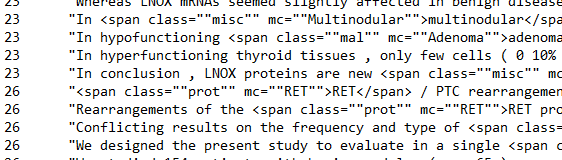

# we can see that we don't have transactions  of the document 24 and 25   
# this will lead to the appearance of null values when grouping by


In [43]:
(data['new']=='nan').sum()

37360

In [45]:
len(data)

42496

In [46]:
len(data)-(data['new']=='nan').sum()

5136

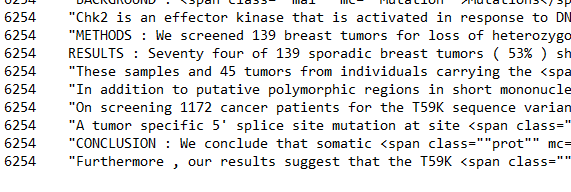

# from 6254 documents we have 5136 non null or empty documents

In [47]:
data = data.drop(data[data.new == 'nan'].index)   

In [48]:
len(data)

5136

# now we have optimized our dataset we can save it as a check point ,
# or continue working on it.

# to save it.

# -+-+-+-+-data.to_csv(r'PATH/SAVEPOINT1.csv')+-+-+-+-

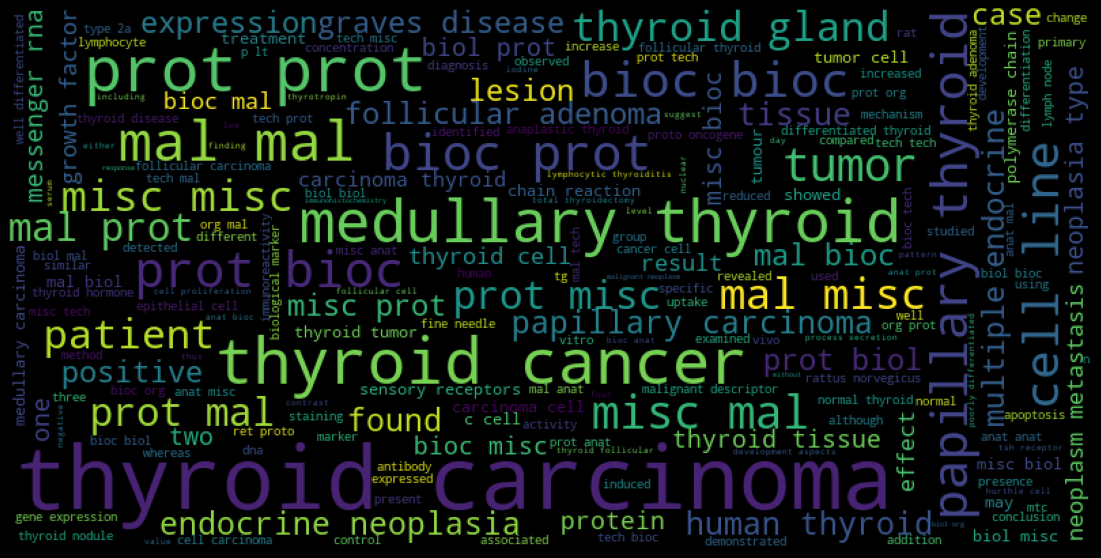

In [50]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud2 = WordCloud(width=800, height=400).generate(' '.join(data['new']))

data = data.astype(dtype={'new': 'string'})


plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

#  We should not consider taking span classes and mcs in the first step 

# because they give  huge weight to the words 

In [54]:
data["new"] = data["new"].apply(nltk.word_tokenize)

In [55]:
data.head()

,new
0,"[life, threatening, giant, mediastinal, goiter, surgical, challenge, mediastinal, goiter, well, known, benign, disease, usually, resectable, cervical, approach, minimal, morbidity, mortalitymisc, misc, miscmediastinal, mediastinal, cervical, approach, occasionally, median, sternotomy, lateral, thoracotomy, may, requiredtech, misc, techsternotomy, lateral, thoracotomy, present, case, worthy, presentation, exceptional, dimension, disease, surgical, challenge, presented, 72, year, old, woman, large, intrathoracic, goiter, right, thorax, caused, severe, dyspnoea, due, important, contralateral, mediastinal, shift, compression, lung, superior, vena, cava, system, trachea, org, mal, anat, misc, mal, misc, misc, tech, anat, anat, anatelderly, woman, intrathoracic, goiter, thorax, severe, dyspnea, contralateral, mediastinal, compression, procedure, lung, superior, vena, cava, trachea, surgical, exploration, cervico, sternotomic, ...]"
1,"[c, cell, thyroid, epithelial, tumours, altered, follicular, development, transgenic, mice, expressing, long, isoform, men, 2a, ret, biol, org, protdevelopment, aspects, transgenic, mice, ret, gain, function, mutations, gene, encoding, receptor, tyrosine, kinase, ret, identified, aetiological, factor, multiple, endocrine, neoplasia, type, 2a, men2a, mal, prot, malmutation, ret, multiple, endocrine, neoplasia, type, 2a, men2a, dominantly, inherited, cancer, predisposition, syndrome, characterized, medullary, thyroid, carcinoma, tumour, calcitonin, producing, thyroid, c, cellsbiol, mal, protpredisposition, medullary, thyroid, carcinoma, calcitonin, three, isoforms, ret, ret9, ret43, ret51, although, vitro, evidence, suggests, vary, cellular, transformation, activities, little, known, function, tumorigenesis, vivo, prot, misc, mal, miscret, vitro, carcinogenesis, vivo, address, used, ...]"
2,"[multivariate, analysis, clinicopathologic, parameters, insular, subtype, differentiated, thyroid, carcinoma, hypothesis, insular, carcinoma, represents, aggressive, subtype, differentiated, thyroid, cancer, multivariate, analysis, controlling, various, clinicopathologic, parametersmalthyroid, cancer, design, retrospective, analysis, setting, tertiary, referral, center, university, hospital, misc, misctertiary, university, hospital, patients, one, hundred, twenty, seven, consecutive, patients, histological, diagnosis, follicular, variant, papillary, thyroid, carcinoma, follicular, thyroid, carcinoma, main, outcome, measure, logistic, regression, model, used, examine, relationship, various, clinicopathologic, parameters, insular, subtypetech, mal, mal, misc, mischistological, diagnosis, papillary, thyroid, carcinoma, follicular, thyroid, carcinoma, primary, treatment, outcome, results, insular, subtype, involved, 14, 127, tumors, unlike, extrathyroidal, extension, nodal, metastasis, primary, tumor, diameter, gpt, 40, ...]"
3,"[thyroid, hormones, thyroid, antibodies, infertile, malesprot, bioc, malthyrotropin, thyroid, antibody, infertility, objective, investigate, incidence, thyroid, dysfunction, thyroid, antibodies, correlation, semen, hormonal, parameters, infertile, menmisc, mal, bioc, bioc, misc, malincidence, thyroid, dysfunction, thyroid, antibody, semen, hormonal, infertility, design, prospective, study, techprospective, study, setting, university, based, andrology, laboratory, misc, miscandrology, laboratory, patient, three, hundred, five, infertile, men, idiopathic, infertilitymalinfertility, intervention, medical, history, clinical, examination, semen, analysis, measurement, free, thyroxin, ft4, free, triiodothyronine, ft3, basal, thyroid, stimulating, hormone, btsh, lh, fsh, free, testosterone, ft, prl, e2, sex, hormone, binding, globulin, shbg, dheas, thyroid, antibodies, thyreoglobulin, antibody, tga, thyroid, peroxidase, antibody, tpo, ab, thyroid, ...]"
4,"[papillary, thyroid, carcinoma, thyroglossal, duct, cyst, comparative, cytohistologic, immunochemical, study, 2, new, cases, review, literatu

In [56]:
import time 
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer
stemmer = SnowballStemmer("english")


start = time.time()
data['stemmed']=data['new'].apply(lambda x: [stemmer.stem(y) for y in x])
print ("stemming.apply duration :"), (time.time() - start)


stemming.apply duration :


(None, 14.033479928970337)

In [57]:
from nltk.stem import WordNetLemmatizer
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]

In [58]:
import time 
start = time.time()
data['lemmed'] = data['new'].apply(lemmatize_text)
print ("Lemmed.apply duration :"), (time.time() - start)

Lemmed.apply duration :


(None, 5.666422367095947)

In [59]:
data.head(2)

,new,stemmed,lemmed
0,"[life, threatening, giant, mediastinal, goiter, surgical, challenge, mediastinal, goiter, well, known, benign, disease, usually, resectable, cervical, approach, minimal, morbidity, mortalitymisc, misc, miscmediastinal, mediastinal, cervical, approach, occasionally, median, sternotomy, lateral, thoracotomy, may, requiredtech, misc, techsternotomy, lateral, thoracotomy, present, case, worthy, presentation, exceptional, dimension, disease, surgical, challenge, presented, 72, year, old, woman, large, intrathoracic, goiter, right, thorax, caused, severe, dyspnoea, due, important, contralateral, mediastinal, shift, compression, lung, superior, vena, cava, system, trachea, org, mal, anat, misc, mal, misc, misc, tech, anat, anat, anatelderly, woman, intrathoracic, goiter, thorax, severe, dyspnea, contralateral, mediastinal, compression, procedure, lung, superior, vena, cava, trachea, surgical, exploration, cervico, sternotomic, ...]","[life, threaten, giant, mediastin, goiter, surgic, challeng, mediastin, goiter, well, known, benign, diseas, usual, resect, cervic, approach, minim, morbid, mortalitymisc, misc, miscmediastin, mediastin, cervic, approach, occasion, median, sternotomi, later, thoracotomi, may, requiredtech, misc, techsternotomi, later, thoracotomi, present, case, worthi, present, except, dimens, diseas, surgic, challeng, present, 72, year, old, woman, larg, intrathorac, goiter, right, thorax, caus, sever, dyspnoea, due, import, contralater, mediastin, shift, compress, lung, superior, vena, cava, system, trachea, org, mal, anat, misc, mal, misc, misc, tech, anat, anat, anateld, woman, intrathorac, goiter, thorax, sever, dyspnea, contralater, mediastin, compress, procedur, lung, superior, vena, cava, trachea, surgic, explor, cervico, sternotom, ...]","[life, threatening, giant, mediastinal, goiter, surgical, challenge, mediastinal, goiter, well, known, benign, disease, usually, resectable, cervical, approach, minimal, morbidity, mortalitymisc, misc, miscmediastinal, mediastinal, cervical, approach, occasionally, median, sternotomy, lateral, thoracotomy, may, requiredtech, misc, techsternotomy, lateral, thoracotomy, present, case, worthy, presentation, exceptional, dimension, disease, surgical, challenge, presented, 72, year, old, woman, large, intrathoracic, goiter, right, thorax, caused, severe, dyspnoea, due, important, contralateral, mediastinal, shift, compression, lung, superior, vena, cava, system, trachea, org, mal, anat, misc, mal, misc, misc, tech, anat, anat, anatelderly, woman, intrathoracic, goiter, thorax, severe, dyspnea, contralateral, mediastinal, compression, procedure, lung, superior, vena, cava, trachea, surgical, exploration, cervico, sternotomic, ...]"
1,"[c, cell, thyroid, epithelial, tumours, altered, follicular, development, transgenic, mice, expressing, long, isoform, men, 2a, ret, biol, org, protdevelopment, aspects, transgenic, mice, ret, gain, function, mutations, gene, encoding, receptor, tyrosine, kinase, ret, identified, aetiological, factor, multiple, endocrine, neoplasia, type, 2a, men2a, mal, prot, malmutation, ret, multiple, endocrine, neoplasia, type, 2a, men2a, dominantly, inherited, cancer, predisposition, syndrome, characterized, medullary, thyroid, carcinoma, tumour, calcitonin, producing, thyroid, c, cellsbiol, mal, protpredisposition, medullary, thyroid, carcinoma, calcitonin, three, isoforms, ret, ret9, ret43, ret51, although, vitro, evidence, suggests, vary, cellular, transformation, activities, little, known, function, tumorigenesis, vivo, prot, misc, mal, miscret, vitro, carcinogenesis, vivo, address, used, ...]","[c, cell, thyroid, epitheli, tumour, alter, follicular, develop, transgen, mice, express, long, isoform, men, 2a, ret, biol, org, protdevelop, aspect, transgen, mice, ret, gain, function, mutat, gene, encod, receptor, tyrosin, kinas, ret, identifi, aetiolog, factor, multipl, endocrin, neoplasia, type, 2a, men2a, mal, prot, malmut, ret, multipl, e

# We can not use  stemming because we will lose the real meaning of the words in some cases like this one

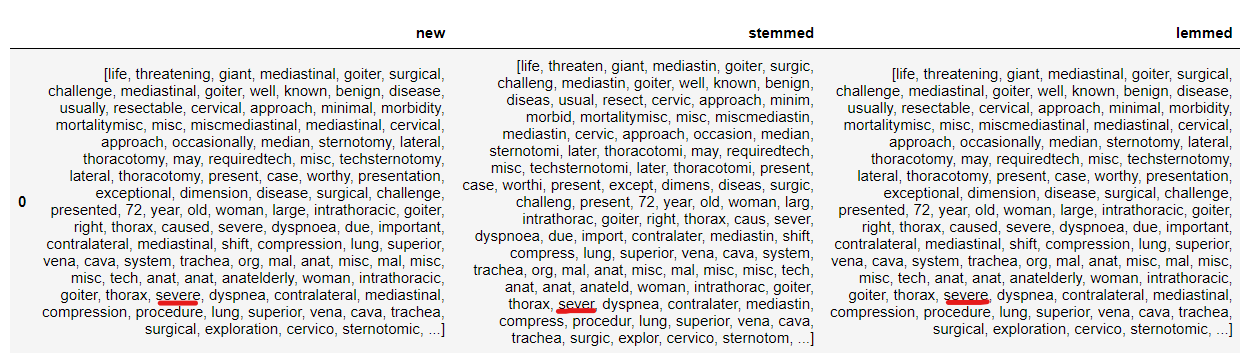

In [60]:
data = data.drop(data.columns[[0,1]], axis=1)   #  0 = new    1  = stemmsed    2 = lemmed
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5136 entries, 0 to 6254
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lemmed  5136 non-null   object
dtypes: object(1)
memory usage: 80.2+ KB


In [61]:
data.head(2)

,lemmed
0,"[life, threatening, giant, mediastinal, goiter, surgical, challenge, mediastinal, goiter, well, known, benign, disease, usually, resectable, cervical, approach, minimal, morbidity, mortalitymisc, misc, miscmediastinal, mediastinal, cervical, approach, occasionally, median, sternotomy, lateral, thoracotomy, may, requiredtech, misc, techsternotomy, lateral, thoracotomy, present, case, worthy, presentation, exceptional, dimension, disease, surgical, challenge, presented, 72, year, old, woman, large, intrathoracic, goiter, right, thorax, caused, severe, dyspnoea, due, important, contralateral, mediastinal, shift, compression, lung, superior, vena, cava, system, trachea, org, mal, anat, misc, mal, misc, misc, tech, anat, anat, anatelderly, woman, intrathoracic, goiter, thorax, severe, dyspnea, contralateral, mediastinal, compression, procedure, lung, superior, vena, cava, trachea, surgical, exploration, cervico, sternotomic, ...]"
1,"[c, cell, thyroid, epithelial, tumour, altered, follicular, development, transgenic, mouse, expressing, long, isoform, men, 2a, ret, biol, org, protdevelopment, aspect, transgenic, mouse, ret, gain, function, mutation, gene, encoding, receptor, tyrosine, kinase, ret, identified, aetiological, factor, multiple, endocrine, neoplasia, type, 2a, men2a, mal, prot, malmutation, ret, multiple, endocrine, neoplasia, type, 2a, men2a, dominantly, inherited, cancer, predisposition, syndrome, characterized, medullary, thyroid, carcinoma, tumour, calcitonin, producing, thyroid, c, cellsbiol, mal, protpredisposition, medullary, thyroid, carcinoma, calcitonin, three, isoforms, ret, ret9, ret43, ret51, although, vitro, evidence, suggests, vary, cellular, transformation, activity, little, known, function, tumorigenesis, vivo, prot, misc, mal, miscret, vitro, carcinogenesis, vivo, address, used, ...]"


In [62]:
# Removing numbers 
data = data.astype(dtype={'lemmed': 'string'})
data['lemmed'] = data['lemmed'].str.replace('\d+', '', regex=True)

In [63]:
data.head()

,lemmed
0,"['life', 'threatening', 'giant', 'mediastinal', 'goiter', 'surgical', 'challenge', 'mediastinal', 'goiter', 'well', 'known', 'benign', 'disease', 'usually', 'resectable', 'cervical', 'approach', 'minimal', 'morbidity', 'mortalitymisc', 'misc', 'miscmediastinal', 'mediastinal', 'cervical', 'approach', 'occasionally', 'median', 'sternotomy', 'lateral', 'thoracotomy', 'may', 'requiredtech', 'misc', 'techsternotomy', 'lateral', 'thoracotomy', 'present', 'case', 'worthy', 'presentation', 'exceptional', 'dimension', 'disease', 'surgical', 'challenge', 'presented', '', 'year', 'old', 'woman', 'large', 'intrathoracic', 'goiter', 'right', 'thorax', 'caused', 'severe', 'dyspnoea', 'due', 'important', 'contralateral', 'mediastinal', 'shift', 'compression', 'lung', 'superior', 'vena', 'cava', 'system', 'trachea', 'org', 'mal', 'anat', 'misc', 'mal', 'misc', 'misc', 'tech', 'anat', 'anat', 'anatelderly', 'woman', 'intrathoracic', 'goiter', 'thorax', 'severe', 'dyspnea', 'contralateral', 'mediastinal', 'compression', 'procedure', 'lung', 'superior', 'vena', 'cava', 'trachea', 'surgical', 'exploration', 'cervico', 'sternotomic', 'approach', 'mediastinal', 'structure', 'dislocation', 'strong', 'adherence', 'anomalous', 'neovascularized', 'capsula', 'mass', 'surrounding', 'structure', 'complicated', 'surgical', 'dissection', 'misc', 'misc', 'techmediastinal', 'circumferential', 'dissection', 'accidental', 'lesion', 'innominate', 'artery', 'required', 'reimplantation', 'ascending', 'aorta', 'mal', 'anat', 'anatlesion', 'artery', 'ascending', 'aorta', 'immense', 'mass', 'finally', 'removed', 'pathological', 'examination', 'revealed', 'rare', 'case', 'neovascularized', 'pseudosarcomatoid', 'capsula', 'among', 'benign', 'hyperplastic', 'proliferation', 'spite', 'benign', 'nature', 'giant', 'goiter', 'caused', 'life', 'threatening', 'compression', 'respiratory', 'tract', 'lung', 'parenchyma', 'patienttech', 'anat', 'anatcompression', 'procedure', 'respiratory', 'tract', 'lung', 'dimension', 'lesion', 'mediastinal', 'anatomy', 'alteration', 'severe', 'intraoperative', 'haemorrhage', 'represented', 'major', 'technical', 'difficulty', 'surgical', 'resection', 'mal', 'misc', 'misc', 'misc', 'mal', 'techlesion', 'mediastinal', 'science', 'anatomy', 'severe', 'intraoperative', 'hemorrhage', 'surgical', 'excision']"
1,"['c', 'cell', 'thyroid', 'epithelial', 'tumour', 'altered', 'follicular', 'development', 'transgenic', 'mouse', 'expressing', 'long', 'isoform', 'men', 'a', 'ret', 'biol', 'org', 'protdevelopment', 'aspect', 'transgenic', 'mouse', 'ret', 'gain', 'function', 'mutation', 'gene', 'encoding', 'receptor', 'tyrosine', 'kinase', 'ret', 'identified', 'aetiological', 'factor', 'multiple', 'endocrine', 'neoplasia', 'type', 'a', 'mena', 'mal', 'prot', 'malmutation', 'ret', 'multiple', 'endocrine', 'neoplasia', 'type', 'a', 'mena', 'dominantly', 'inherited', 'cancer', 'predisposition', 'syndrome', 'characterized', 'medullary', 'thyroid', 'carcinoma', 'tumour', 'calcitonin', 'producing', 'thyroid', 'c', 'cellsbiol', 'mal', 'protpredisposition', 'medullary', 'thyroid', 'carcinoma', 'calcitonin', 'three', 'isoforms', 'ret', 'ret', 'ret', 'ret', 'although', 'vitro', 'evidence', 'suggests', 'vary', 'cellular', 'transformation', 'activity', 'little', 'known', 'function', 'tumorigenesis', 'vivo', 'prot', 'misc', 'mal', 'miscret', 'vitro', 'carcinogenesis', 'vivo', 'address', 'used', 'ret', 'cdna', 'construct', 'mouse', 'frequent', 'mena', 'mutation', 'cys', '', 'arg', 'expressed', 'control', 'human', 'calcitonin', 'promoter', 'ct', 'a', 'mouse', 'bioc', 'bioc', 'bioc', 'org', 'prot', 'bioccomplementary', 'dna', 'cysteine', 'arginine', 'human', 'calcitonin', 'promoter', 'mouse', 'developed', 'c', 'cell', 'tumour', 'resembling', 'human', 'mtc', 'follicular', 'tumour', 'resembling', 'human', 'papillary', 'thyroid', 'carcinoma', 'ptc', 'depending', 'founder', 'line', 'examinedorg', 'org', 'malhuman', 'human', 'papillary', 'thyroid', 'carcinoma', 'one',

In [64]:
# again removing nois while progressing
data['lemmed'] =data['lemmed'].astype(str)
data['lemmed'] = data['lemmed'].apply(lambda x: remove_punct(x))
data.head()

,lemmed
0,life threatening giant mediastinal goiter surgical challenge mediastinal goiter well known benign disease usually resectable cervical approach minimal morbidity mortalitymisc misc miscmediastinal mediastinal cervical approach occasionally median sternotomy lateral thoracotomy may requiredtech misc techsternotomy lateral thoracotomy present case worthy presentation exceptional dimension disease surgical challenge presented year old woman large intrathoracic goiter right thorax caused severe dyspnoea due important contralateral mediastinal shift compression lung superior vena cava system trachea org mal anat misc mal misc misc tech anat anat anatelderly woman intrathoracic goiter thorax severe dyspnea contralateral mediastinal compression procedure lung superior vena cava trachea surgical exploration cervico sternotomic approach mediastinal structure dislocation strong adherence anomalous neovascularized capsula mass surrounding structure complicated surgical dissection misc misc techmediastinal circumferential dissection accidental lesion innominate artery required reimplantation ascending aorta mal anat anatlesion artery ascending aorta immense mass finally removed pathological examination revealed rare case neovascularized pseudosarcomatoid capsula among benign hyperplastic proliferation spite benign nature giant goiter caused life threatening compression respiratory tract lung parenchyma patienttech anat anatcompression procedure respiratory tract lung dimension lesion mediastinal anatomy alteration severe intraoperative haemorrhage represented major technical difficulty surgical resection mal misc misc misc mal techlesion mediastinal science anatomy severe intraoperative hemorrhage surgical excision
1,c cell thyroid epithelial tumour altered follicular development transgenic mouse expressing long isoform men a ret biol org protdevelopment aspect transgenic mouse ret gain function mutation gene encoding receptor tyrosine kinase ret identified aetiological factor multiple endocrine neoplasia type a mena mal prot malmutation ret multiple endocrine neoplasia type a mena dominantly inherited cancer predisposition syndrome characterized medullary thyroid carcinoma tumour calcitonin producing thyroid c cellsbiol mal protpredisposition medullary thyroid carcinoma calcitonin three isoforms ret ret ret ret although vitro evidence suggests vary cellular transformation activity little known function tumorigenesis vivo prot misc mal miscret vitro carcinogenesis vivo address used ret cdna construct mouse frequent mena mutation cys arg expressed control human calcitonin promoter ct a mouse bioc bioc bioc org prot bioccomplementary dna cysteine arginine human calcitonin promoter mouse developed c cell tumour resembling human mtc follicular tumour resembling human papillary thyroid carcinoma ptc depending founder line examinedorg org malhuman human papillary thyroid carcinoma one founder line developed compound mtc ptc low frequency pancreatic cystadenocarcinoma misc misc mallow frequency pancreatic cystadenocarcinoma ct a mouse also displayed developmental defect thyroid follicular structure much thyroid occupied large irregular cystic follicle thought derived ultimobranchial body developmental precursor thyroid gland misc misc misc anatdevelopmental irregular developmental thyroid gland ct a mouse provide suitable model study effect men a ret mutation vivo prot miscret vivo
2,multivariate analysis clinicopathologic parameter insular subtype differentiated thyroid carcinoma hypothesis insular carcinoma represents aggressive subtype differentiated thyroid cancer multivariate analysis controlling various clinicopathologic parametersmalthyroid cancer design retrospective analysis setting tertiary referral center university hospital misc misctertiary university hospital patient one hundred twenty seven consecutive patient histological diagnosis follicular variant papillary thyroid carcinoma follicular thyroid carcinoma main outcome m

In [67]:
data=data.rename(columns={data.columns[0]: 'text'})

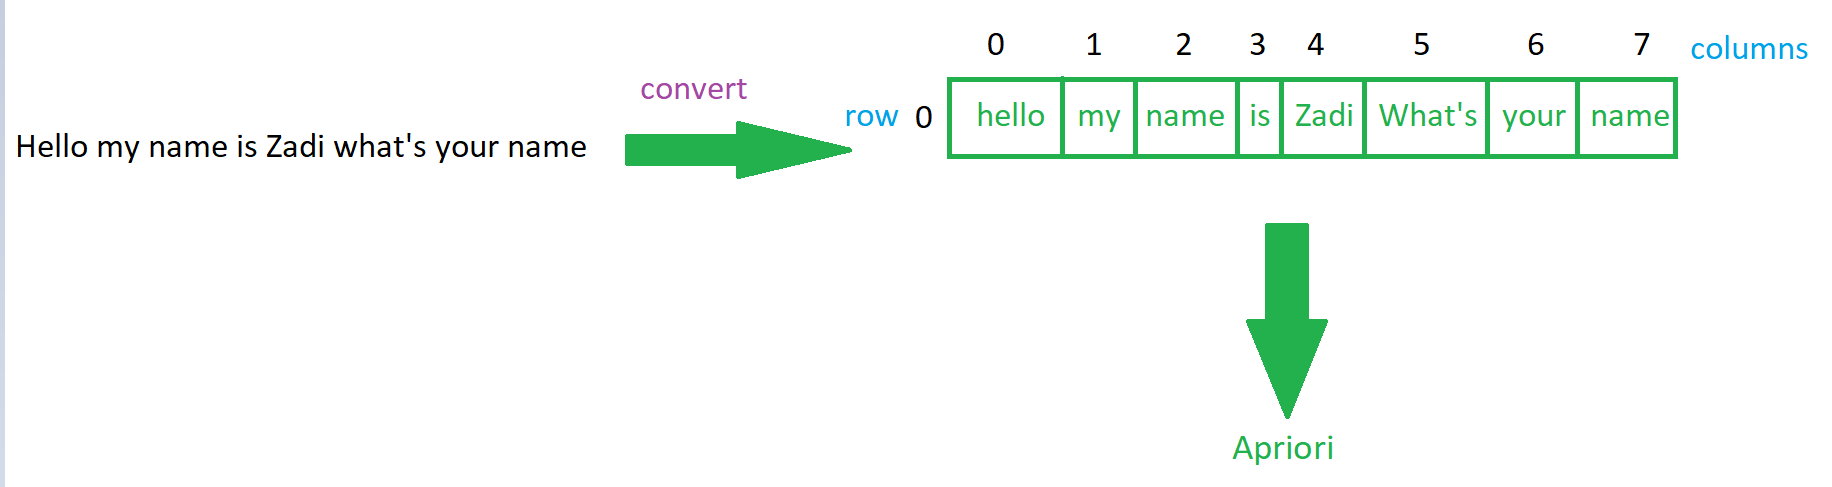

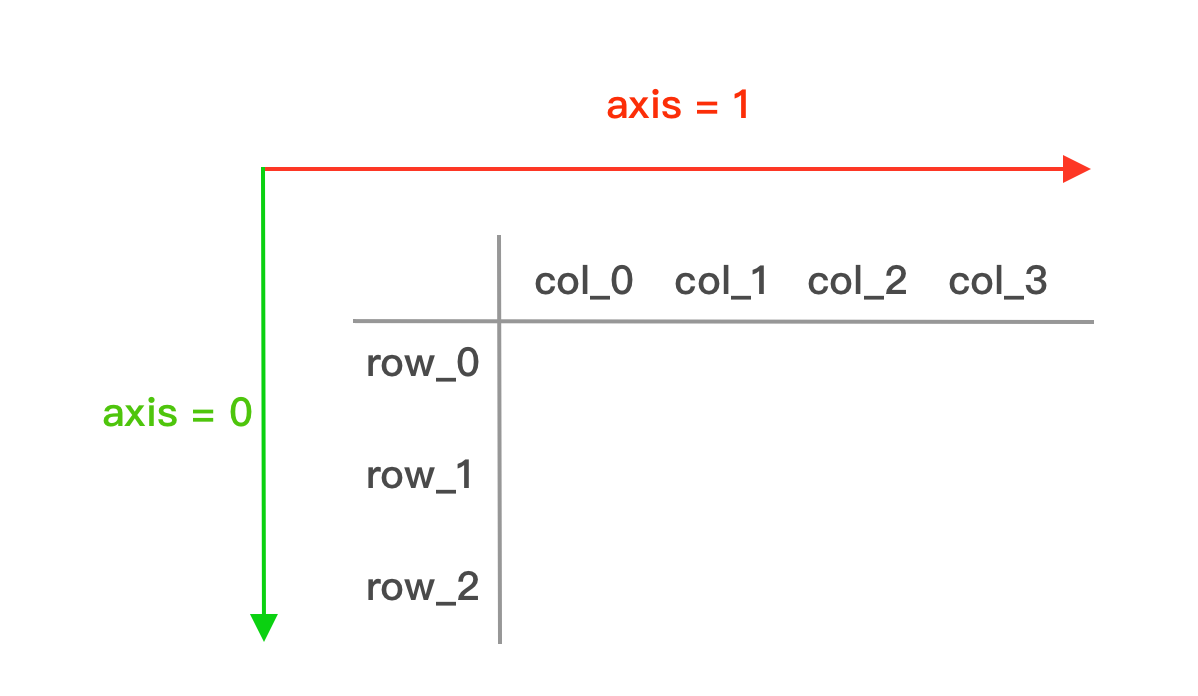

In [84]:
text_matrix = data['text'].apply(lambda x: pd.Series(x.split(' ')))  #  convert text into matrix of items

# remove duplicate items PER ROW as we don't need them

text_matrix=(pd.DataFrame(text_matrix.apply(pd.Series.unique, axis=1).tolist())) 
text_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,262,263,264,265,266,267,268,269,270,271
0,life,threatening,giant,mediastinal,goiter,surgical,challenge,well,known,benign,...,None,None,None,None,None,None,None,None,None,NaN
1,c,cell,thyroid,epithelial,tumour,altered,follicular,development,transgenic,mouse,...,None,None,None,None,None,None,None,None,None,NaN
2,multivariate,analysis,clinicopathologic,parameter,insular,subtype,differentiated,thyroid,carcinoma,hypothesis,...,None,None,None,None,None,None,None,None,None,NaN
3,thyroid,hormone,antibody,infertile,malesprot,bioc,malthyrotropin,infertility,objective,investigate,...,None,None,None,None,None,None,None,None,None,NaN
4,papillary,thyroid,carcinoma,thyroglossal,duct,cyst,comparative,cytohistologic,immunochemical,study,...,None,None,None,None,None,None,None,None,None,NaN


# We can see that we have null values 
# because the lenght of each document  differ 
# let's handle that by filling the null values with empty strings 
# this will prevent errors when calling the algorithm

In [85]:
text_matrix = text_matrix.fillna('')
text_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,262,263,264,265,266,267,268,269,270,271
0,life,threatening,giant,mediastinal,goiter,surgical,challenge,well,known,benign,...,,,,,,,,,,
1,c,cell,thyroid,epithelial,tumour,altered,follicular,development,transgenic,mouse,...,,,,,,,,,,
2,multivariate,analysis,clinicopathologic,parameter,insular,subtype,differentiated,thyroid,carcinoma,hypothesis,...,,,,,,,,,,
3,thyroid,hormone,antibody,infertile,malesprot,bioc,malthyrotropin,infertility,objective,investigate,...,,,,,,,,,,
4,papillary,thyroid,carcinoma,thyroglossal,duct,cyst,comparative,cytohistologic,immunochemical,study,...,,,,,,,,,,


##  Another thing we should bare in mind:
#  [Cell , Cells]  
## The two words mean the same thing 
## but the algorithm will differ between them 
## we should singularize 'Cells'  and drop duplicates  per row 
## this will optimize the dataset also

In [87]:
text_matrix.info()   # memory usage 10.7+  let's see if we can reduce it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5136 entries, 0 to 5135
Columns: 272 entries, 0 to 271
dtypes: object(272)
memory usage: 10.7+ MB


In [88]:
from pattern.text.en import singularize

In [89]:
text_matrix=text_matrix.applymap(str)
text_matrix=text_matrix.applymap(singularize)
text_matrix=(pd.DataFrame(text_matrix.apply(pd.Series.unique, axis=1).tolist()))   ##axis 1 means drop duplicates in one line

In [90]:
text_matrix.info()    # memory usage 10.6+ MB   we did reduce some noise from it even if it's small it has a weight

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5136 entries, 0 to 5135
Columns: 271 entries, 0 to 270
dtypes: object(271)
memory usage: 10.6+ MB


#       ­ ­  ­ ­  ­ ­  ­ ­  ­ ­  ­ ­  ­ ­  ­ ­  ­ ­  ­ ­  ­ ­  ­ ­  ­ ­  ­  ­ ­  ­ ­  ­ ­  ­ ­  ­ ­  ­ ­  ­ ­ ­  ­ ­  ­ ­  ­ ­  ­  ­                                 APRIORI TIME

In [94]:
# Put all transactions into a single list
trl=text_matrix.values.reshape(-1).tolist()


# Create a dataframe using this single list and add a column for count
df_list=pd.DataFrame(trl)
df_list['Count']=1

# Group by items and rename columns
df_list=df_list.groupby(by=[0], as_index=False).count().sort_values(by=['Count'], ascending=True) # count
df_list['Percentage'] = (df_list['Count'] / df_list['Count'].sum()) # percentage
df_list=df_list.rename(columns={0 : 'Item'})

# Show dataframe
df_list

,Item,Count,Percentage
34974,zymographytechreverse,1,0.000002
15922,isoglutamine,1,0.000002
15921,isogln,1,0.000002
15920,isogenesbioc,1,0.000002
15918,isogene,1,0.000002
...,...,...,...
25761,prot,3833,0.007890
19470,misc,3847,0.007919
17229,mal,4154,0.008551
32485,thyroid,4804,0.009889


# We can see - thyroid-  is the most frequent word in the whole corpus.
# the class "ABC" an mc"ABC"  are the main reason , we should take  them in consideration

#  and this word appears in just 0.009 of the entire corpus 
# We can use this information  when setting the minimum support threshold.

In [97]:
#unfortunately we can not visualize the frequency distribution in a small time  
# Draw a horizontal bar chart
""""
plt.figure(figsize=(16,20), dpi=300)
plt.ylabel('Item Name')
plt.xlabel('Count')
plt.barh(df_list['Item'], width=df_list['Count'], color='black', height=0.8)
plt.margins(0.01)   
plt.show()

""""

# if you have a cluster in your desk please uncomment and execute it will give something like this
# but Biiiiiiiiig

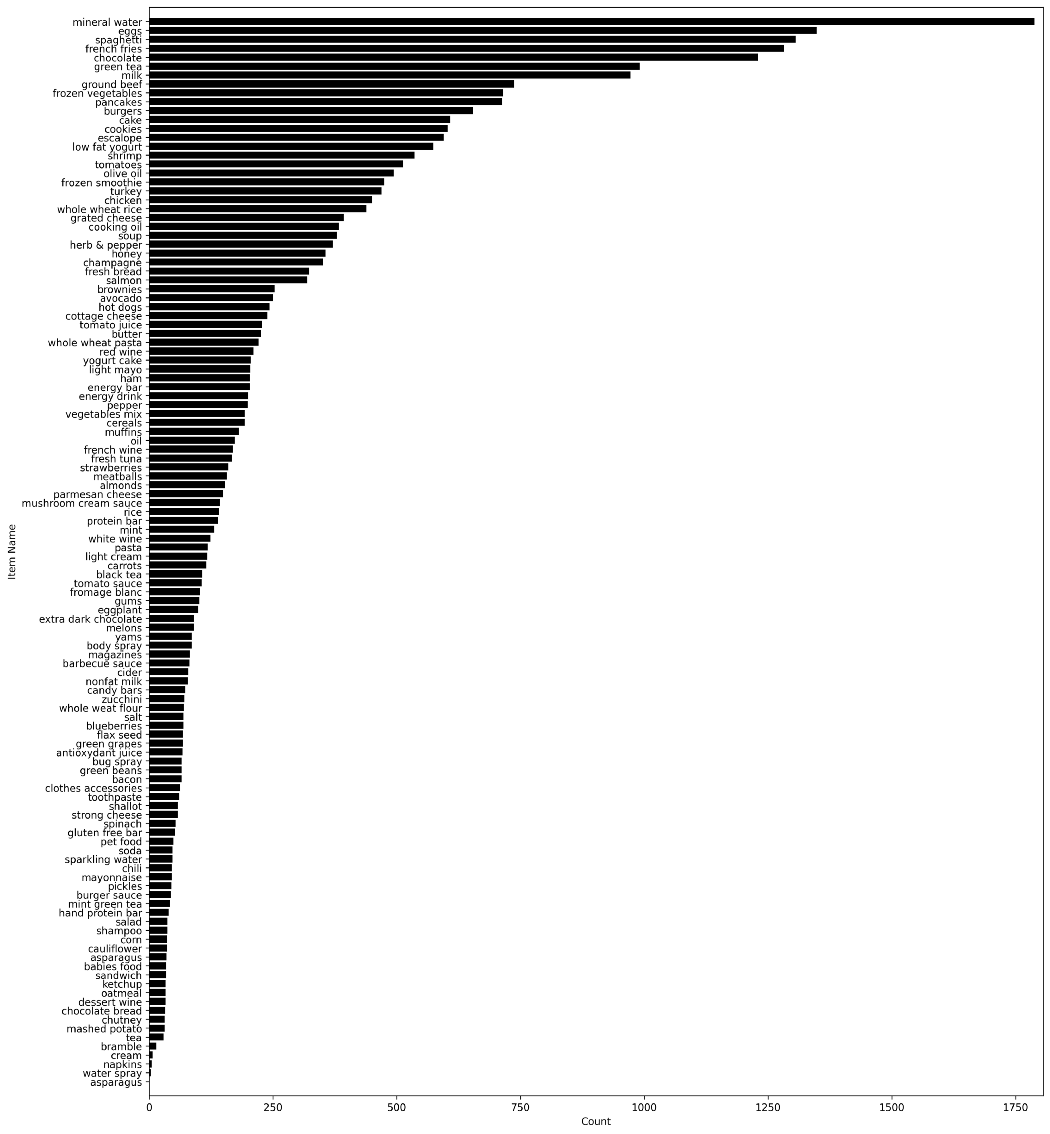

# As fo passing the corpus to algorithm. it will take forever to execute

# but for the sake of argument we can trim the top 5 rows and pass them
# and see what result will we get

In [115]:
trimmed = pd.DataFrame()
trimmed=trimmed.append(text_matrix[:5])  # The first five Rows
trimmed = trimmed.fillna('')
trimmed=(pd.DataFrame(trimmed.apply(pd.Series.unique, axis=1).tolist()))   ##axis 1 means drop duplicates in one line
trimmed

,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
0,life,threatening,giant,mediastinal,goiter,surgical,challenge,well,known,benign,...,resection,techlesion,science,hemorrhage,excision,None,None,None,None,None
1,c,cell,thyroid,epithelial,tummy,altered,follicular,development,transgenic,mouse,...,ultimobranchial,body,precursor,gland,anatdevelopmental,provide,suitable,model,study,effect
2,multivariate,analysi,clinicopathologic,parameter,insular,subtype,differentiated,thyroid,carcinoma,hypothesi,...,None,None,None,None,None,None,None,None,None,None
3,thyroid,hormone,antibody,infertile,malesprot,bioc,malthyrotropin,infertility,objective,investigate,...,None,None,None,None,None,None,None,None,None,None
4,papillary,thyroid,carcinoma,thyroglossal,duct,cyst,comparative,cytohistologic,immunochemical,study,...,None,None,None,None,None,None,None,None,None,None


In [145]:
"""
To make use of the Apriori algorithm
it is required to convert the whole transactional dataset
into a single list and each row will be a list in that list.
"""
#Range will be   Rows * columns   --->  5*125=
data_list = []
for row in range(0,5):
    data_list.append([str(trimmed.values[row,column]) for column in range(0, 70)]) #loopin through all 125cols will take time
algo = apriori(data_list, min_support=0.40, min_confidence=0.8, min_lift=2, min_length=4)
results = list(algo)

In [146]:
for i in range(0,3):
    print(f"Required Association No. {i} is: {results[i]}")
    print('-'*25)

Required Association No. 0 is: RelationRecord(items=frozenset({'analysi', 'design'}), support=0.4, ordered_statistics=[OrderedStatistic(items_base=frozenset({'analysi'}), items_add=frozenset({'design'}), confidence=1.0, lift=2.5), OrderedStatistic(items_base=frozenset({'design'}), items_add=frozenset({'analysi'}), confidence=1.0, lift=2.5)])
-------------------------
Required Association No. 1 is: RelationRecord(items=frozenset({'analysi', 'hundred'}), support=0.4, ordered_statistics=[OrderedStatistic(items_base=frozenset({'analysi'}), items_add=frozenset({'hundred'}), confidence=1.0, lift=2.5), OrderedStatistic(items_base=frozenset({'hundred'}), items_add=frozenset({'analysi'}), confidence=1.0, lift=2.5)])
-------------------------
Required Association No. 2 is: RelationRecord(items=frozenset({'main', 'analysi'}), support=0.4, ordered_statistics=[OrderedStatistic(items_base=frozenset({'analysi'}), items_add=frozenset({'main'}), confidence=1.0, lift=2.5), OrderedStatistic(items_base=fr

# Another implimentation
# Here We can pass all the corpus

In [148]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [174]:
# Now The document Term matrix
data = data.astype(dtype={'text': 'string'})
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(lowercase=False)
X = vec.fit_transform(data['text'])
document_term_matrix = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

document_term_matrix.head()

,aa,aaa,aaaac,aaalys,aac,aact,aacta,aactbiol,aad,aaf,...,zooorgsarcophilus,zoster,zr,zygotic,zymogen,zymographic,zymography,zymographybiol,zymographyprot,zymographytechreverse
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
f = lambda x: False if x==0 else True
document_term_matrix=document_term_matrix.applymap(f)   #  The algorithm needs a bool matrix 0/1 or true/false 

In [176]:
from mlxtend.frequent_patterns import apriori,association_rules
# Extracting the most frequest itemsets via Mlxtend.
# The length column has been added to increase ease of filtering.

frequent_itemsets = apriori(document_term_matrix, min_support=0.40, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# printing the frequent itemset
frequent_itemsets

,support,itemsets,length
0,0.417640,(anat),1
1,0.731308,(bioc),1
2,0.578271,(biol),1
3,0.419782,(cancer),1
4,0.632593,(carcinoma),1
...,...,...,...
75,0.488318,"(mal, thyroid, prot, bioc)",4
76,0.447625,"(misc, thyroid, prot, bioc)",4
77,0.442952,"(misc, mal, thyroid, carcinoma)",4
78,0.438863,"(mal, thyroid, carcinoma, prot)",4


# The output shows that anat is the most frequently occurring item in 
# THE TRIMMED DATASET. We can explore the frequent item more to get the inside. For example, we can print out all items with a length of 3, and the minimum support is more than 0.03

In [193]:
# printing the frequntly items 
#distinct_l = set(l)
(frequent_itemsets[ (frequent_itemsets['length'] == 3) &
                   (frequent_itemsets['support'] >= 0.03) ]).drop_duplicates()


,support,itemsets,length
46,0.435164,"(thyroid, biol, bioc)",3
47,0.426597,"(mal, carcinoma, bioc)",3
48,0.463980,"(thyroid, carcinoma, bioc)",3
49,0.424455,"(cell, thyroid, bioc)",3
50,0.482282,"(misc, mal, bioc)",3
51,0.502726,"(mal, prot, bioc)",3
52,0.582555,"(mal, thyroid, bioc)",3
53,0.469431,"(misc, prot, bioc)",3
54,0.539330,"(misc, thyroid, bioc)",3
55,0.582360,"(thyroid, prot, bioc)",3


# Creating association rules
# We know that the association rules are simply the if-else statements. The IF component of an association rule is known as the antecedent. The THEN component is known as the consequent. The antecedent and the consequent are disjoint; they have no items in common.

# So, let’s create antecedents and consequents

In [199]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.1)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
2,(cell),(biol),0.567757,0.578271,0.411604,0.724966,1.253678,0.083287,1.533369,1,1
3,(biol),(cell),0.578271,0.567757,0.411604,0.711785,1.253678,0.083287,1.499722,1,1
62,"(misc, carcinoma)","(mal, thyroid)",0.481114,0.777843,0.442952,0.920680,1.183633,0.068721,2.800769,2,2
63,"(mal, thyroid)","(misc, carcinoma)",0.777843,0.481114,0.442952,0.569462,1.183633,0.068721,1.205204,2,2
36,"(mal, thyroid)","(carcinoma, bioc)",0.777843,0.466900,0.424260,0.545432,1.168198,0.061085,1.172761,2,2
...,...,...,...,...,...,...,...,...,...,...,...
15,"(misc, bioc)",(prot),0.569899,0.746301,0.469431,0.823710,1.103725,0.044116,1.439105,2,1
53,"(misc, bioc)","(thyroid, prot)",0.569899,0.712422,0.447625,0.785446,1.102501,0.041616,1.340351,2,2
54,"(thyroid, prot)","(misc, bioc)",0.712422,0.569899,0.447625,0.628314,1.102501,0.041616,1.157162,2,2
64,"(mal, carcinoma)","(misc, thyroid)",0.569704,0.706581,0.442952,0.777512,1.100386,0.040410,1.318808,2,2


# The output shows the values of various supporting components of the Apriori algorithm.

# To get more insights from the data, let’s sort the data by the confidence value:

In [200]:
# Sort values based on confidence
rules.sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
59,"(misc, thyroid, carcinoma)",(mal),0.477025,0.808801,0.442952,0.928571,1.148084,0.057134,2.676791,3,1
23,"(misc, carcinoma)",(mal),0.481114,0.808801,0.446651,0.928369,1.147834,0.057526,2.669230,2,1
62,"(misc, carcinoma)","(mal, thyroid)",0.481114,0.777843,0.442952,0.920680,1.183633,0.068721,2.800769,2,2
35,"(thyroid, carcinoma, bioc)",(mal),0.463980,0.808801,0.424260,0.914394,1.130555,0.048993,2.233471,3,1
7,"(carcinoma, bioc)",(mal),0.466900,0.808801,0.426597,0.913678,1.129670,0.048967,2.214957,2,1
...,...,...,...,...,...,...,...,...,...,...,...
28,(mal),"(carcinoma, prot)",0.808801,0.484618,0.441394,0.545739,1.126121,0.049434,1.134550,1,2
36,"(mal, thyroid)","(carcinoma, bioc)",0.777843,0.466900,0.424260,0.545432,1.168198,0.061085,1.172761,2,2
74,(mal),"(thyroid, carcinoma, prot)",0.808801,0.481893,0.438863,0.542610,1.125997,0.049108,1.132747,1,3
8,(mal),"(carcinoma, bioc)",0.808801,0.466900,0.426597,0.527443,1.129670,0.048967,1.128118,1,2


# The Apriori algorithm allows you to mine for frequent itemset and learns association rules between items over relational databases’ data (large datasets). The algorithm identifies the frequent individual items in the database. It extends them to larger and larger item sets as long as those item sets appear sufficiently often in the database.

# Conclusions

Apriori is a straightforward algorithm that quickly learns association rules between items (data points).
 there are many practical applications, 
 including bioinformatics (protein sequencing),
 medical diagnosis (relationship between symptoms and disease),
 or Census data analysis
 
One thing to be careful about when using Apriori on large datasets is the choice of minimum support threshold. If you are not careful, you can quickly run out of memory with a potentially huge number of itemsets of size 2.